In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
df_1= pd.read_csv(r"ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [3]:
df_2= pd.read_csv(r"ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
#Preprocessing

df_3= pd.concat([df_2,df_1],axis= 0)
df_3.reset_index(drop= True, inplace= True)
df_3.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
218110,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
218111,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
218112,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
218113,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
218114,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [6]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218115 non-null  object 
 1   town                 218115 non-null  object 
 2   flat_type            218115 non-null  object 
 3   block                218115 non-null  object 
 4   street_name          218115 non-null  object 
 5   storey_range         218115 non-null  object 
 6   floor_area_sqm       218115 non-null  float64
 7   flat_model           218115 non-null  object 
 8   lease_commence_date  218115 non-null  int64  
 9   remaining_lease      218115 non-null  object 
 10  resale_price         218115 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.3+ MB


In [7]:
df_3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [9]:
# Creating a new column "address"
df_3["address"]= df_3["block"]+" "+df_3["street_name"]


In [10]:
#droping the "street_name" and "block"
df_4= df_3.drop(columns=["block","street_name"])


In [11]:
df_4.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


In [12]:
# for month
df_4["month"] = pd.to_datetime(df_4["month"], format="%Y-%m")
#spliting the month column to "Year", "month", "day"
df_4["year"]= df_4["month"].dt.year
df_4["month"]= df_4["month"].dt.month

In [13]:
df_4.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,2017
1,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,2017
2,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,2017
3,1,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,2017
4,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,2017


In [14]:
df_4["town"].unique()
df_4["town"].nunique()
df_4["flat_type"].unique()
df_4["flat_type"].nunique()
df_4["flat_model"].unique()
df_4["flat_model"].nunique()



21

In [15]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_4["town"]= LabelEncoder().fit_transform(df_4["town"])
df_4["flat_model"]= OrdinalEncoder().fit_transform(df_4[["flat_model"]])
df_4["flat_type"]= OrdinalEncoder().fit_transform(df_4[["flat_type"]])


In [16]:
df_4["town"].unique()
df_4["flat_type"].unique()
df_4["flat_model"].unique()

array([ 5., 12.,  4., 17.,  3., 16.,  8., 13.,  2.,  9.,  7., 19., 20.,
       10., 18.,  6., 15., 11., 14.,  0.,  1.])

In [17]:
df_4.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
218110,12,25,4.0,13 TO 15,112.0,5.0,2000,82,488000.0,297 YISHUN ST 20,2016
218111,12,25,4.0,01 TO 03,122.0,5.0,1987,69,455000.0,838 YISHUN ST 81,2016
218112,12,25,5.0,10 TO 12,181.0,3.0,1992,74,778000.0,664 YISHUN AVE 4,2016
218113,12,25,5.0,01 TO 03,146.0,7.0,1988,70,575000.0,325 YISHUN CTRL,2016
218114,12,25,6.0,10 TO 12,164.0,11.0,1987,70,735000.0,666 YISHUN AVE 4,2016


In [18]:
df_4[["storey_start", "storey_end"]]= df_4["storey_range"].str.split(" TO ",expand=True)
#droping the "storey_range" column
df_4.drop(columns=["storey_range"],inplace= True)


In [19]:
df_4.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,1.0,44.0,5.0,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,2017,10,12
1,1,0,2.0,67.0,12.0,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,2017,01,03
2,1,0,2.0,67.0,12.0,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,2017,01,03
3,1,0,2.0,68.0,12.0,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,2017,04,06
4,1,0,2.0,67.0,12.0,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,2017,01,03


In [20]:
df_4["address"].nunique()

9589

In [21]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_4["address"]= LabelEncoder().fit_transform(df_4["address"])
df_4["storey_start"]= df_4["storey_start"].astype(int)
df_4["storey_end"]= df_4["storey_end"].astype(int)
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_4["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)
#droping the "remaining_lease" column
df_4.drop(columns=["remaining_lease"],inplace= True)
df_5= pd.concat([df_4,df_data],axis=1)

In [22]:
df_5.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

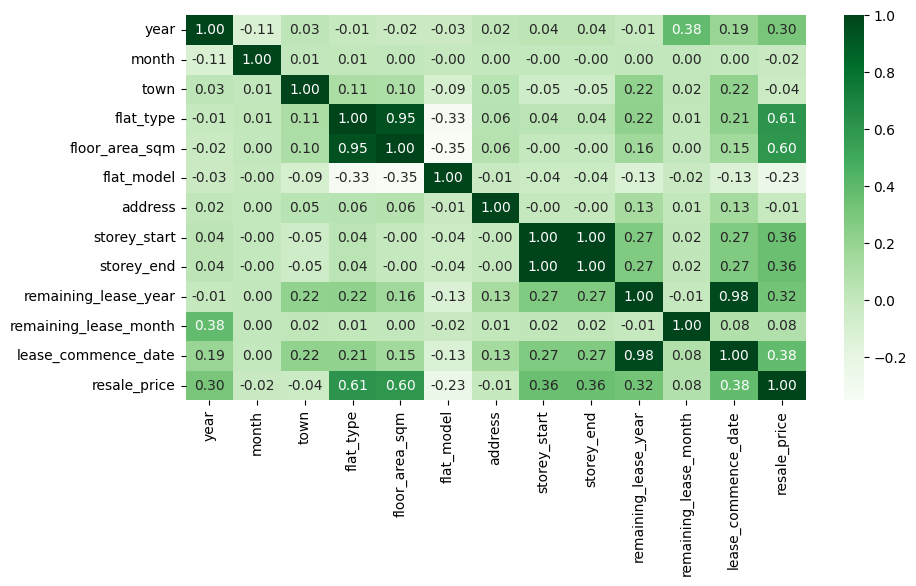

In [23]:
# set the columns
df_6= df_5[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]
df_7=df_6.sort_values(by=["year","month"])
df_7.to_csv("ResaleFlatPrices.csv", index= False)
# Checking the Correlation using heatmap

df_7_corr= df_7.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_7_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [24]:
df_final= pd.read_csv(r"ResaleFlatPrices.csv")
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1466,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5435,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6750,7,9,64,0,1980,290000.0


In [25]:
# checking the duplicate values
df_final.duplicated().sum()



312

In [26]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)


In [27]:
df_final_1.tail()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217798,2024,6,25,3.0,92.0,8.0,5167,10,12,89,10,2015,543000.0
217799,2024,6,25,3.0,84.0,16.0,8483,10,12,61,7,1986,528888.0
217800,2024,6,25,3.0,104.0,8.0,8986,10,12,63,7,1988,590000.0
217801,2024,6,25,4.0,113.0,5.0,6198,4,6,92,11,2018,700000.0
217802,2024,6,25,4.0,112.0,5.0,6084,10,12,92,8,2018,738000.0


In [28]:
df_final_2= df_final_1.drop(columns=["month","address"])


In [29]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217801,2024,25,4.0,113.0,5.0,4,6,92,11,2018,700000.0
217802,2024,25,4.0,112.0,5.0,10,12,92,8,2018,738000.0


In [30]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

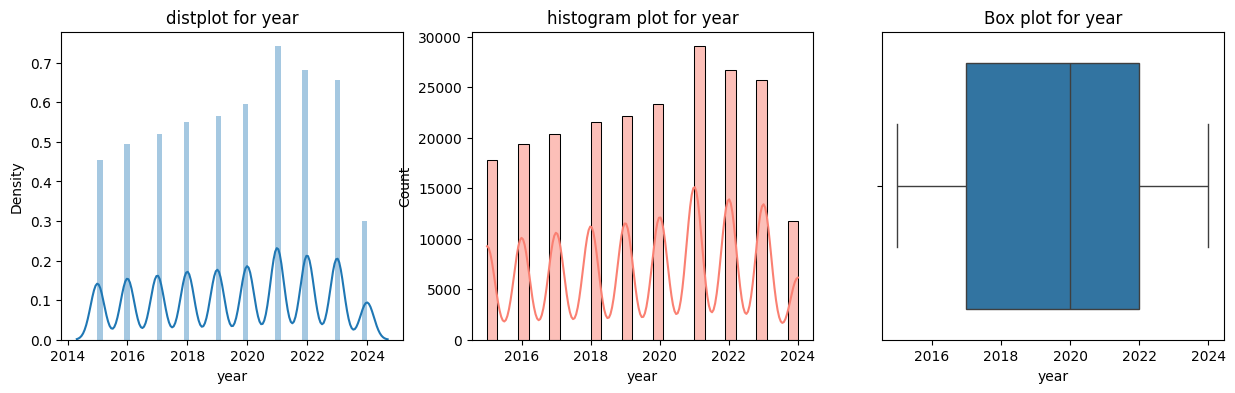

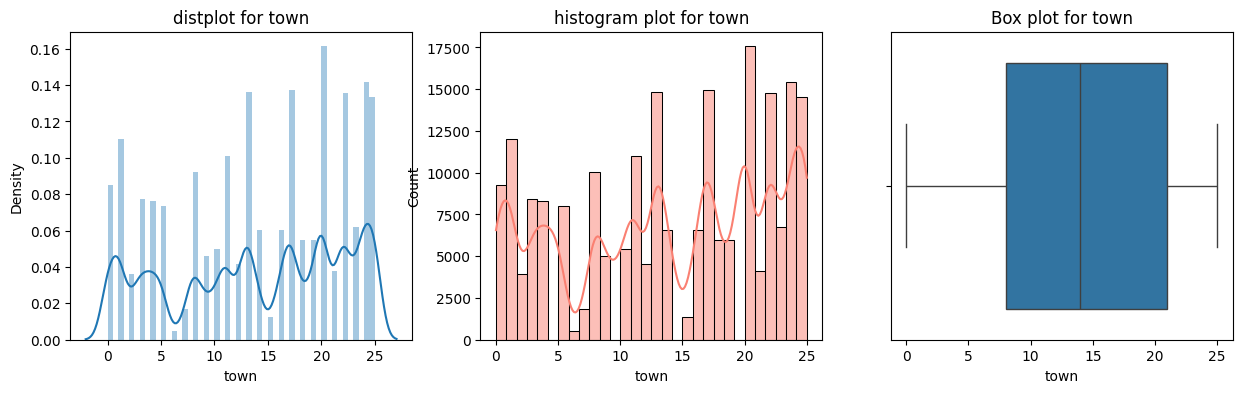

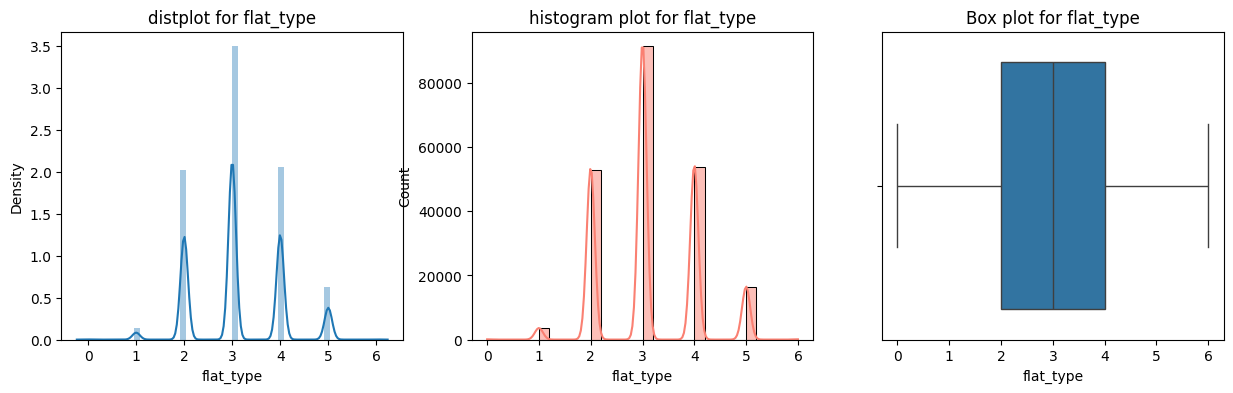

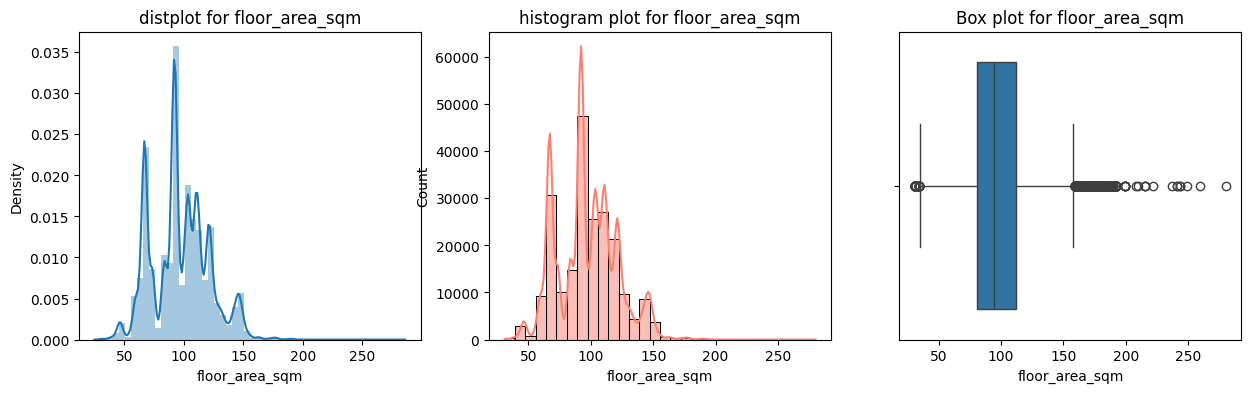

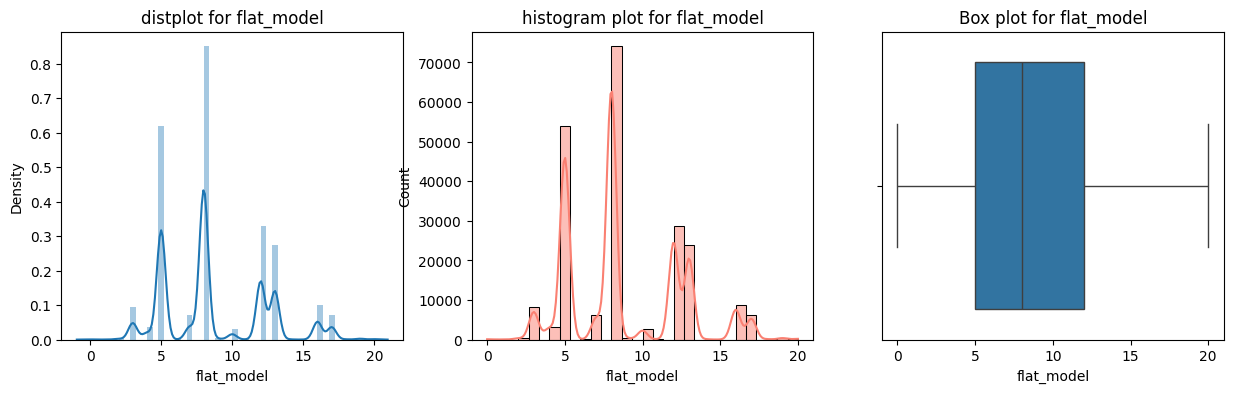

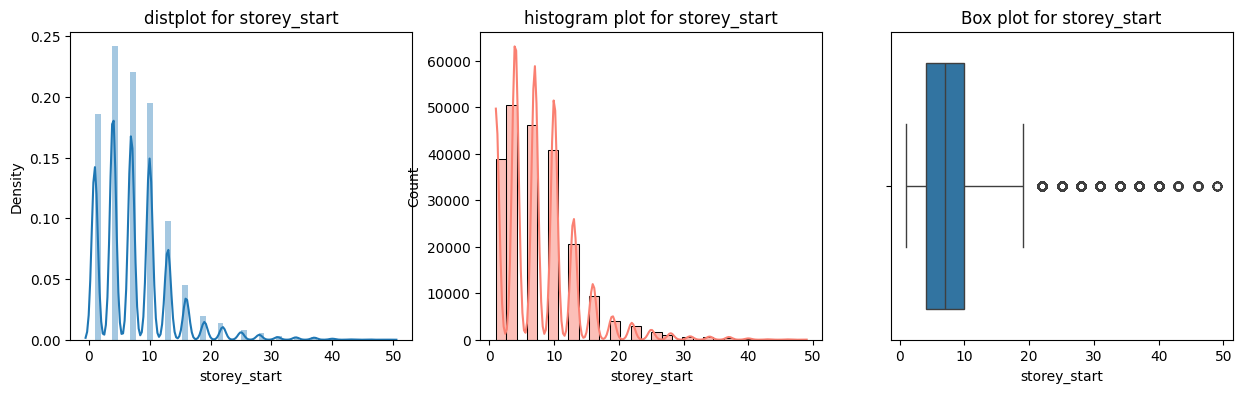

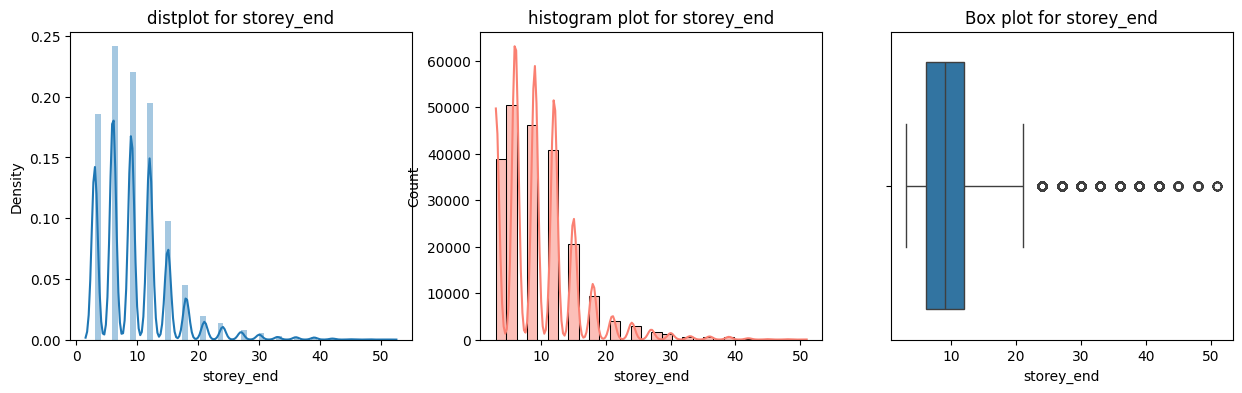

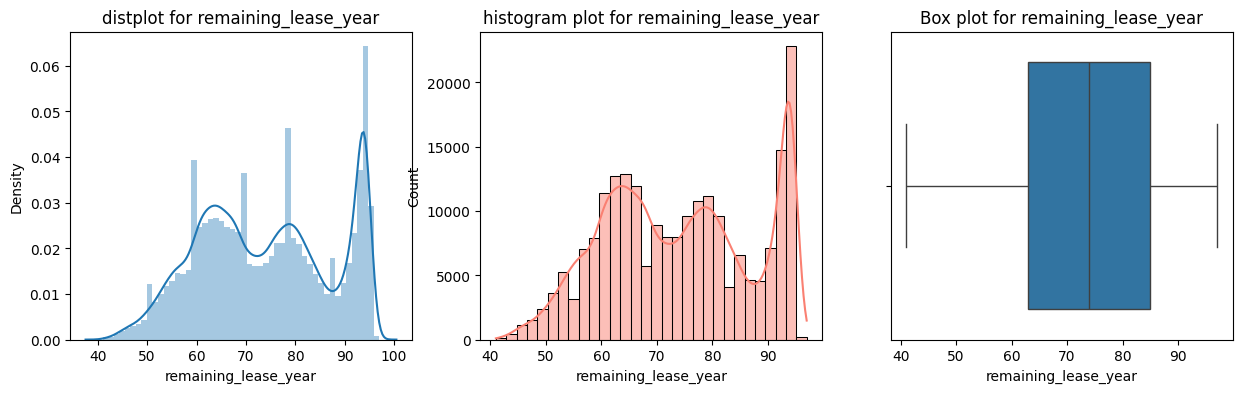

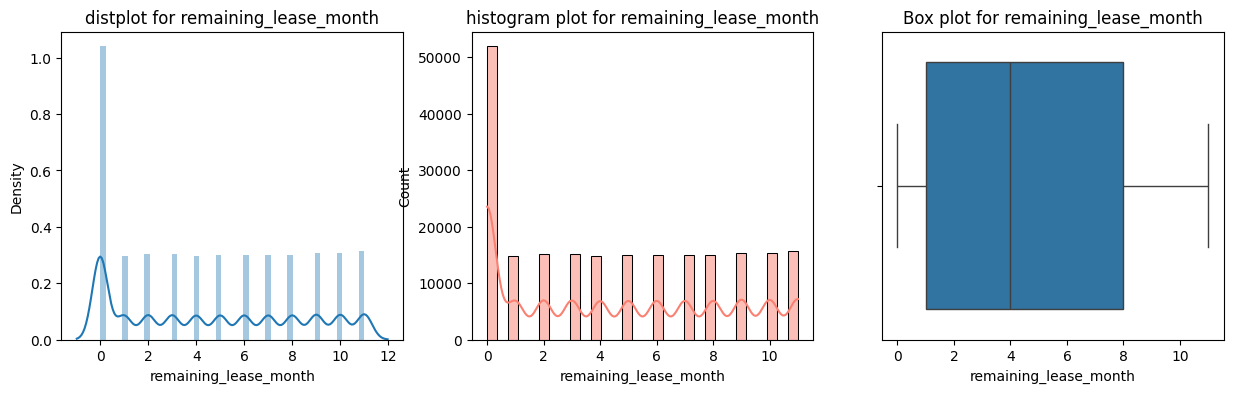

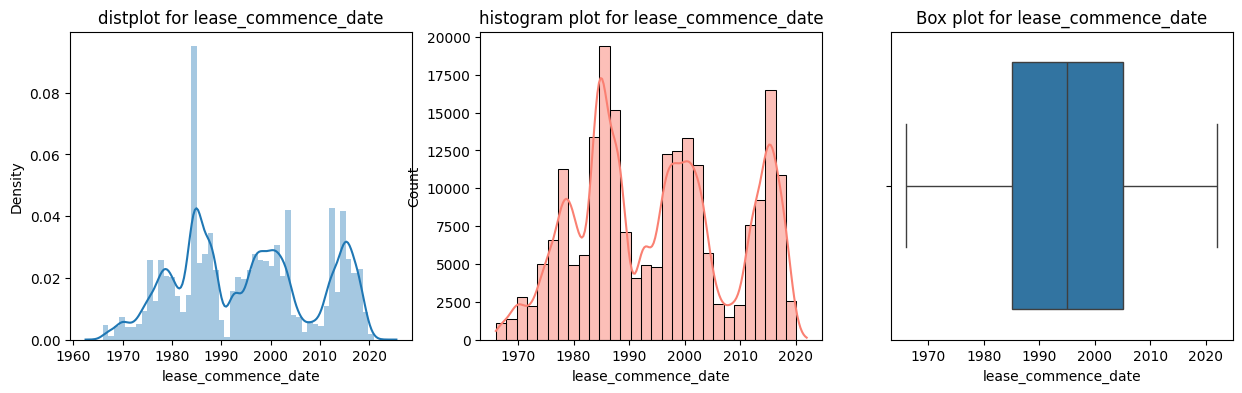

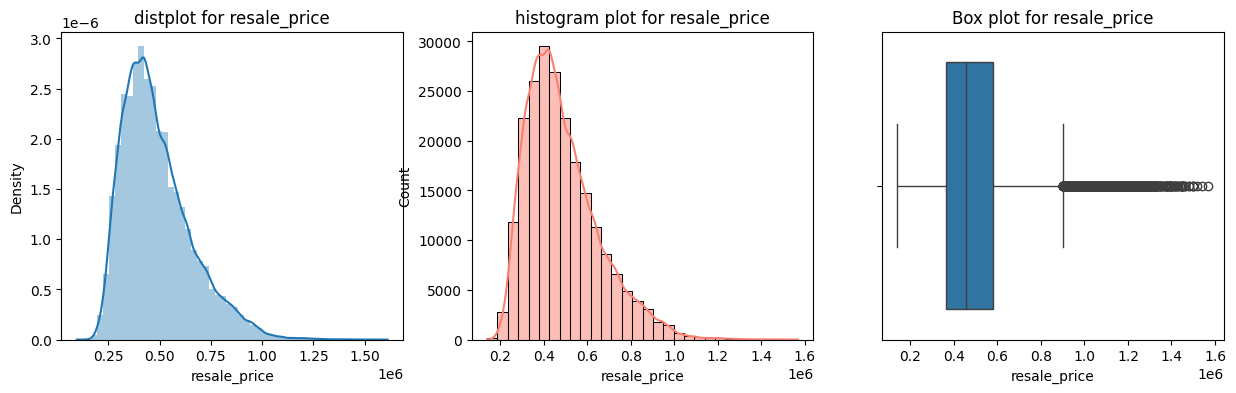

In [31]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [32]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217803.0,2019.606667,2.683167,2015.0,2017.0,2020.0,2022.0,2024.0
town,217803.0,13.892187,7.956046,0.0,8.0,14.0,21.0,25.0
flat_type,217803.0,3.120907,0.919342,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,217803.0,97.137197,24.058940,31.0,81.0,94.0,112.0,280.0
flat_model,217803.0,8.690693,3.646424,0.0,5.0,8.0,12.0,20.0
storey_start,217803.0,7.656300,5.843696,1.0,4.0,7.0,10.0,49.0
storey_end,217803.0,9.656300,5.843696,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,217803.0,74.098888,13.476884,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,217803.0,4.601062,3.782125,0.0,1.0,4.0,8.0,11.0
lease_commence_date,217803.0,1995.139819,13.682024,1966.0,1985.0,1995.0,2005.0,2022.0


In [33]:
#skewness handling
df_final_3= df_final_2.copy()

In [34]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])


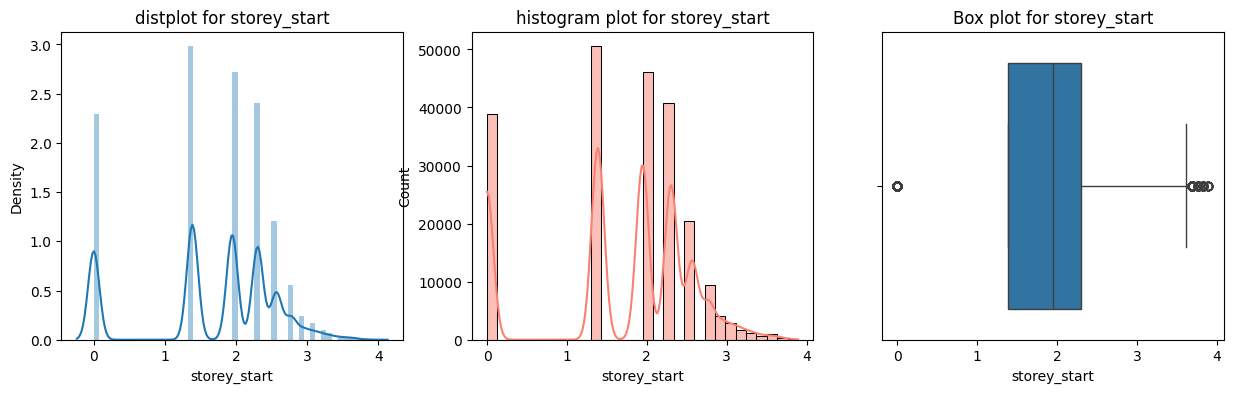

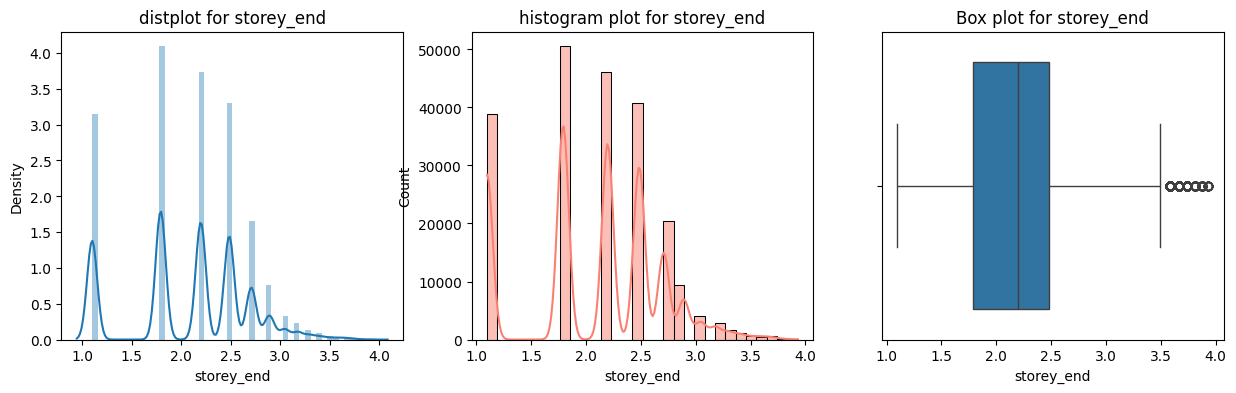

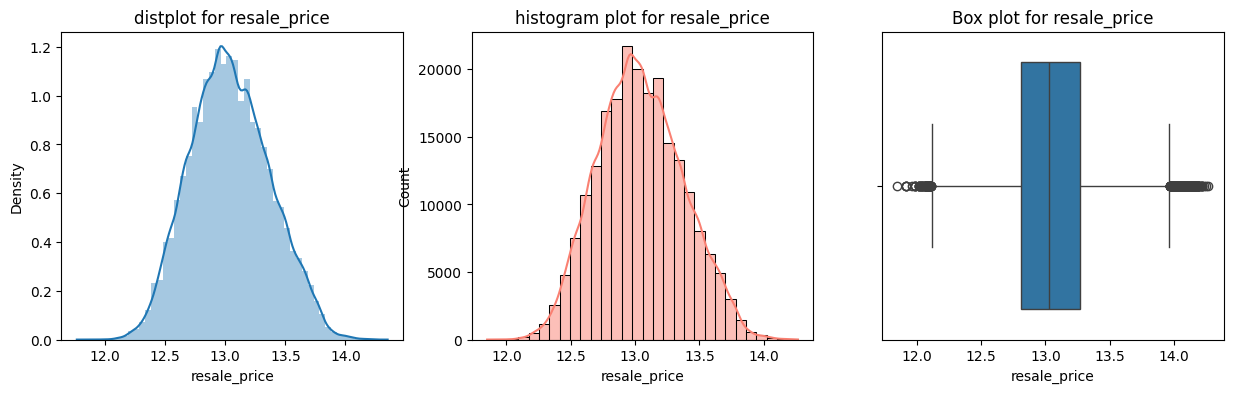

In [35]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

In [36]:
#Outliers Handling - Interquartile Range(IQR) Method
df_final_4= df_final_3.copy()

In [37]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)


In [38]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

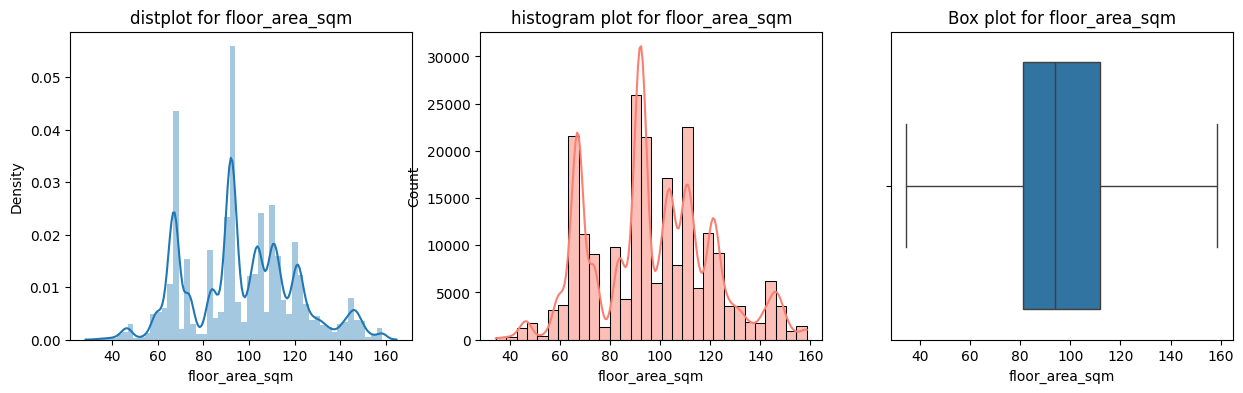

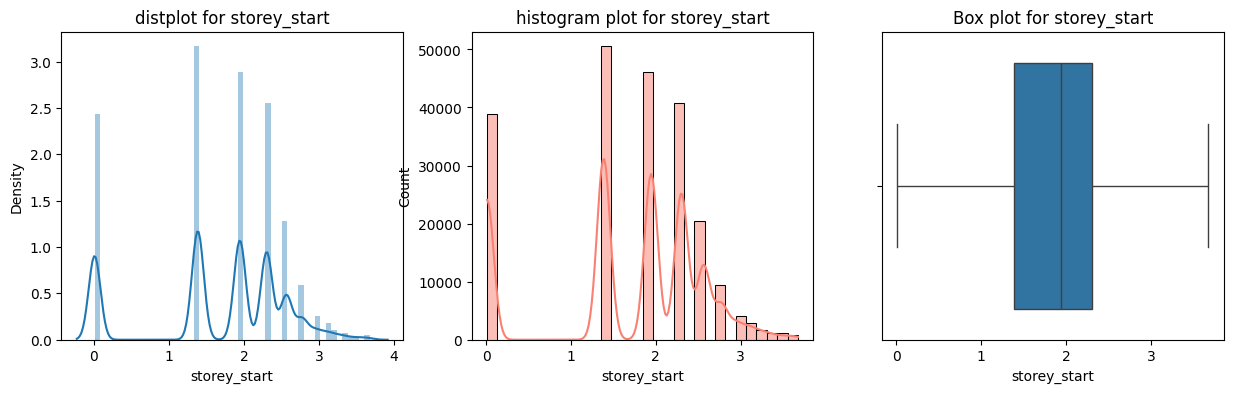

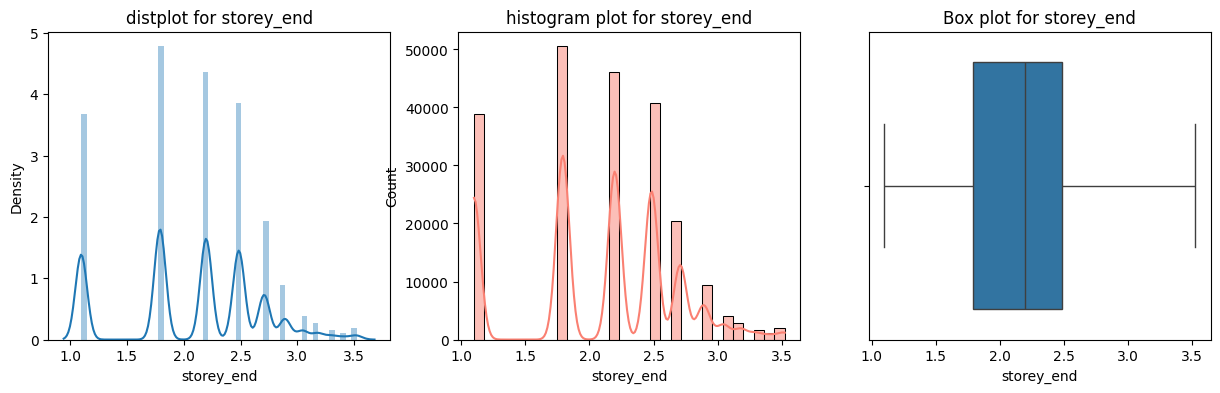

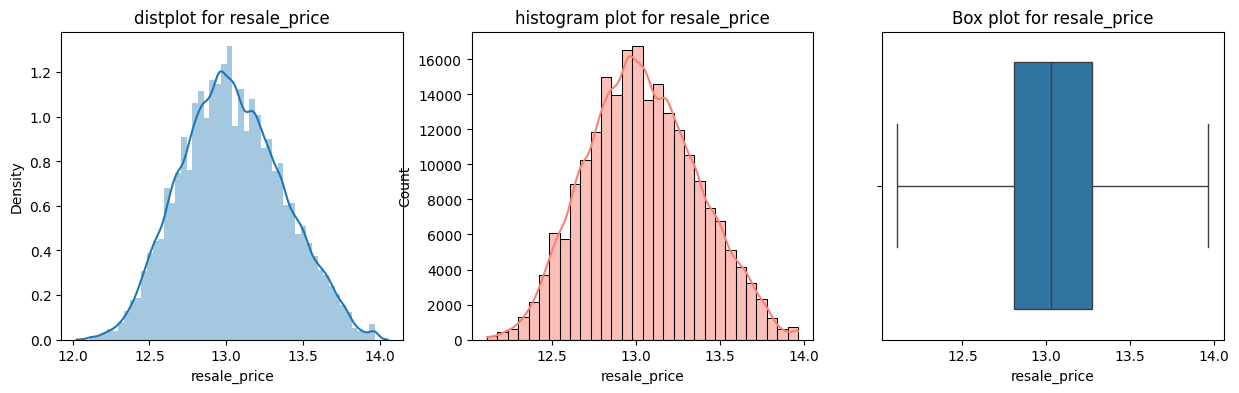

In [39]:
for k in outlier_columns:
    plot(df_final_4,k)

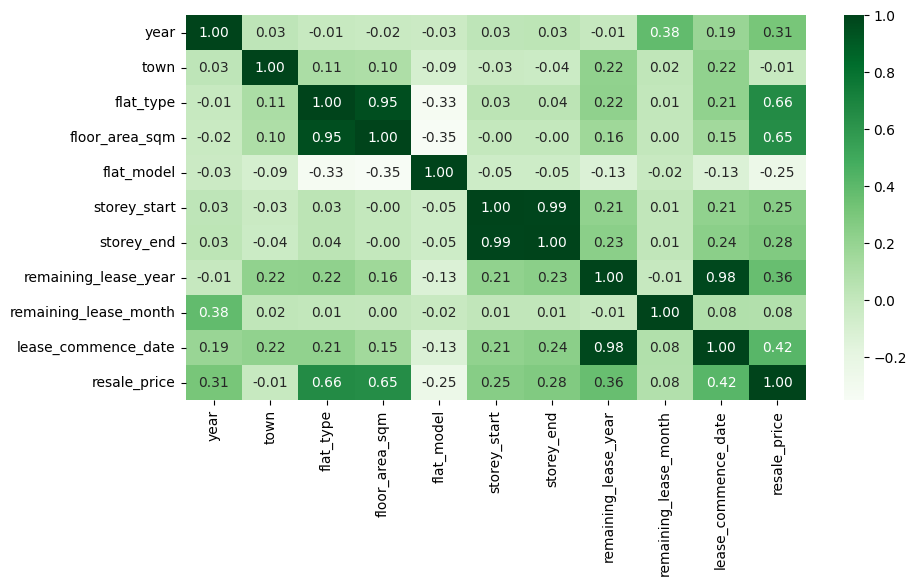

In [40]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

In [41]:
#Model Selection (Regression)
df_final_5= df_final_4.copy()
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217803.0,2019.606667,2.683167,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,217803.0,13.892187,7.956046,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,217803.0,3.120907,0.919342,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,217803.0,97.064033,23.825439,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,217803.0,8.690693,3.646424,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,217803.0,1.695309,0.920888,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,217803.0,2.093171,0.601257,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,217803.0,74.098888,13.476884,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,217803.0,4.601062,3.782125,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,217803.0,1995.139819,13.682024,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


In [42]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2.0,259.0,18.0,6819,1,3,54,0,1972,1150000.0
38448,2017,2,2,4.0,120.0,4.0,3225,40,42,93,7,2011,1180000.0
47892,2017,7,18,5.0,156.0,3.0,1227,19,21,77,3,1995,1160000.0
54395,2017,11,7,4.0,107.0,20.0,1942,43,45,92,2,2011,1138000.0
60199,2018,3,7,4.0,107.0,20.0,1939,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217106,2024,5,21,5.0,146.0,7.0,3955,4,6,60,9,1986,1180000.0
217107,2024,5,21,5.0,146.0,7.0,3955,4,6,60,9,1986,1200000.0
217355,2024,5,23,4.0,110.0,4.0,1064,16,18,87,0,2012,1310000.0
217356,2024,5,23,4.0,115.0,5.0,1121,16,18,75,9,2001,1200000.0


In [43]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8083,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6204,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3556,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1414,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8083,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5844,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2343,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8083,4,6,53,1,1975,180000.0
197151,2023,8,22,2.0,67.0,8.0,6376,7,9,91,3,2015,150000.0


In [44]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6757450134347054, 'Mean_squared_error': 0.03567564970116305, 'Root_mean_squared_error': 0.18887998756131644, 'Mean_absolute_error': 0.14791320410680528}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6715989879324744, 'Mean_squared_error': 0.03570811359998265, 'Root_mean_squared_error': 0.1889659059195141, 'Mean_absolute_error': 0.1478950394691884}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962101879054253, 'Mean_squared_error': 0.0004169681711033783, 'Root_mean_squared_error': 0.020419798507903507, 'Mean_absolute_error': 0.00725961310222052}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.92578510640952, 'Mean_squared_error': 0.00806962753998631, 'Root_mean_squared_error': 0.08983110563711387, 'Mean_absolute_error': 0.06410202263196457}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911532345448888, 'Mean_squared_error': 0.0009733

In [45]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9543897050422104, 'Mean_squared_error': 0.004959356195122141, 'Root_mean_squared_error': 0.0704226965908161, 'Mean_absolute_error': 0.051555322706332965}


In [46]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)
import pickle
import numpy as np
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.325275161184353